In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('insurance_data.csv')
df.sample(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1071,1071,1072,44.0,female,28.0,82,Yes,0,Yes,northwest,20234.85
1022,1022,1023,58.0,female,28.9,83,Yes,0,Yes,northwest,17748.51
146,146,147,47.0,female,34.0,84,No,0,No,southeast,2473.33
326,326,327,18.0,male,30.8,97,Yes,0,No,southwest,4646.76
987,987,988,37.0,female,21.9,89,Yes,1,Yes,northeast,15359.10
223,223,224,28.0,female,28.8,99,Yes,0,No,northeast,3385.40
929,929,930,26.0,female,33.2,106,No,0,No,southwest,13462.52
1120,1120,1121,47.0,male,25.8,101,Yes,2,Yes,northwest,23807.24
420,420,421,58.0,female,29.6,95,Yes,0,No,southwest,5910.94
1117,1117,1118,26.0,female,26.1,99,Yes,1,Yes,northeast,23401.31


# Drop Unnecessary Columns

In [4]:
df.drop(columns=['index','PatientID'],inplace=True)
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


# How Large data is?

In [5]:
df.shape

(1340, 9)

# How Many Null Values

In [6]:
df.isnull().sum()

age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

# What type of data is?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


# Why do EDA?

- Model building
- Analysis and reporting
- Validate assumptions
- Handling missing values
- feature engineering
- detecting outliers

# Column Types

- **Numerical** - age,bmi,bloodpressure,claim
- **Categorical** -gender, diabetic,children,smoker, region

# UniVariant EDA and Feature Engineering

# Age 

- **Missing Values**     3 
- **Shape** Binomial
- **Outliers** No|

In [8]:
df['age'].describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [11]:
for i in range(6):
    print(i,' ',df[df['children']==i]['claim'].mean(),' ',df[df['children']==i]['claim'].min(),' ',df[df['children']==i]['claim'].max())

0   12327.993159722222   1121.87   63770.43
1   12731.171820987654   1711.03   58571.07
2   15073.563999999997   2304.0   49577.66
3   15355.318535031845   3443.06   60021.4
4   13850.656799999999   4504.66   40182.25
5   8786.035555555556   4687.8   19023.26


<AxesSubplot: xlabel='age', ylabel='Count'>

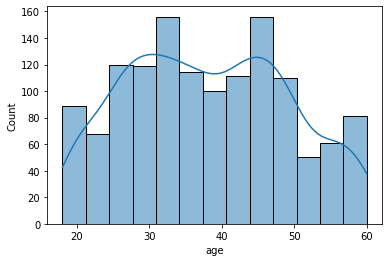

In [12]:
sns.histplot(df['age'],kde=True)

- Data is almost Normally Distributed
- Mostly Patience are of age 30 to 35 and 40 to 45

<AxesSubplot: xlabel='age', ylabel='Density'>

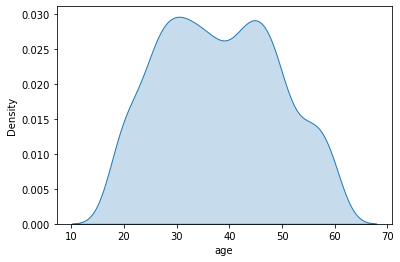

In [13]:
sns.kdeplot(df['age'],fill=True)

In [14]:
df['age'].fillna(df['age'].mean(),inplace=True)

In [15]:
df['age'].skew()

0.11382341584545372

In [16]:
df['age'].isnull().sum()

0

<AxesSubplot: >

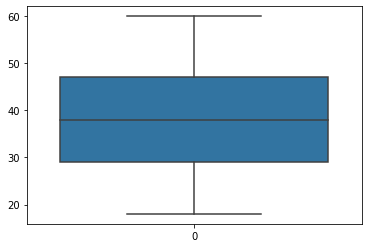

In [17]:
sns.boxplot(df['age'])

- No Outliers

# BMI

- **Missing Values**     0 
- **Shape** Noraml Distriubution
- **Outliers** 4 max 

In [18]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

<AxesSubplot: xlabel='bmi', ylabel='Count'>

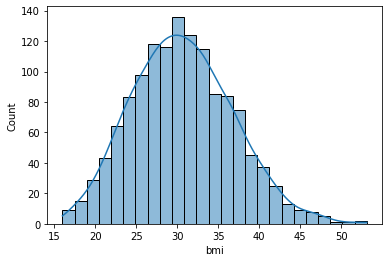

In [19]:
sns.histplot(df['bmi'],kde=True)

<AxesSubplot: xlabel='bmi', ylabel='Density'>

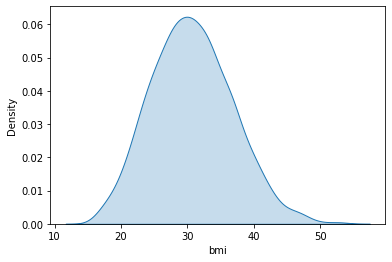

In [20]:
sns.kdeplot(df['bmi'],fill=True)

- Normally Distributed

<AxesSubplot: >

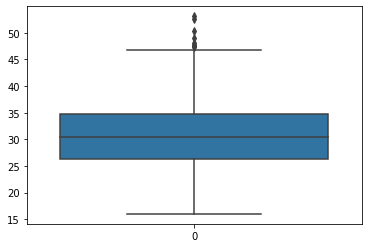

In [21]:
sns.boxplot(df['bmi'])

In [22]:
upper_limit= df['bmi'].mean()+3*df['bmi'].std()
upper_limit

48.9891595244066

In [23]:
df[df['bmi']>upper_limit].shape

(4, 9)

- There are 4 outliers in BMI

In [26]:
df['bmi']= np.where(df['bmi'] >upper_limit,upper_limit,df['bmi'])


# After Outlier Detection

<AxesSubplot: >

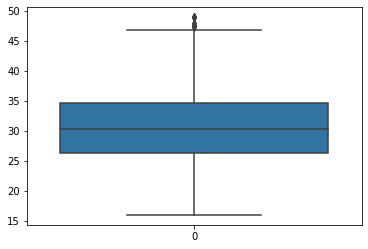

In [27]:
sns.boxplot(df['bmi'])

# Blood Pressure

- **Missing Values**     0 
- **Shape** Positive Skewed
- **Outliers** 4.6 % Outliers 

In [28]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<AxesSubplot: xlabel='bloodpressure', ylabel='Count'>

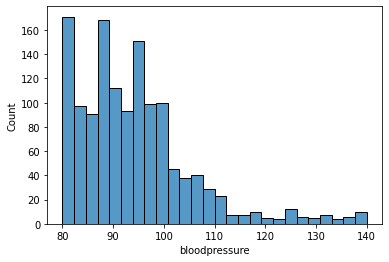

In [29]:
sns.histplot(df['bloodpressure'])

In [30]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,38.078652,male,33.3,82,Yes,0,No,southeast,1135.94
3,38.078652,male,33.7,80,No,0,No,northwest,1136.40
4,38.078652,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...
1335,44.000000,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,59.000000,female,38.1,120,No,1,Yes,northeast,58571.07
1337,30.000000,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,37.000000,male,30.4,106,No,0,Yes,southeast,62592.87


<AxesSubplot: xlabel='bloodpressure', ylabel='Density'>

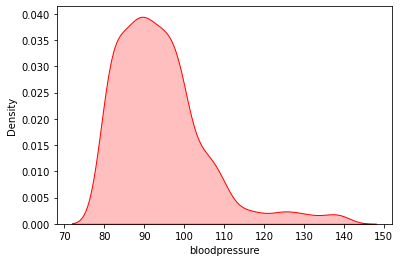

In [31]:
sns.kdeplot(df['bloodpressure'],fill=True,color='red')

- **Positively Skewed Data in BloodPressure**

In [32]:
df['bloodpressure'].skew()

1.4835342102293079

<AxesSubplot: >

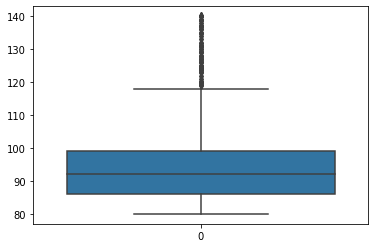

In [33]:
sns.boxplot(df['bloodpressure'])

In [34]:
iqr = df['bloodpressure'].quantile(0.75) - df['bloodpressure'].quantile(0.25)
upper_limit= df['bloodpressure'].quantile(0.75) + iqr *1.5
df[df['bloodpressure']>upper_limit].shape

(62, 9)

In [35]:
df[df['bloodpressure']>upper_limit].shape[0]/df.shape[0]*100

4.626865671641791

- There are 62 Outliers in BloodPressure Column Which Is 4% of the data 

In [36]:
df['bloodpressure']= np.where(df['bloodpressure'] >upper_limit,upper_limit,df['bloodpressure'])

# After Outlier Detection

<AxesSubplot: >

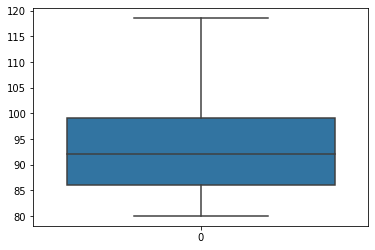

In [37]:
sns.boxplot(df['bloodpressure'])

# claim

- **Missing Values**     0 
- **Shape** Positive Skewed
- **Outliers** 4.6 % Outliers 

In [38]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

In [39]:
df['claim'].skew()

1.5167468509489237

<AxesSubplot: xlabel='claim', ylabel='Count'>

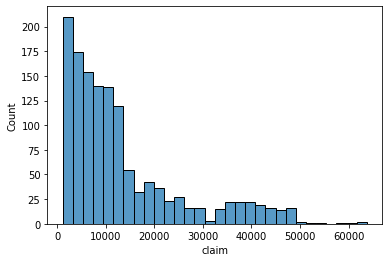

In [40]:
sns.histplot(df['claim'])

<AxesSubplot: xlabel='claim', ylabel='Density'>

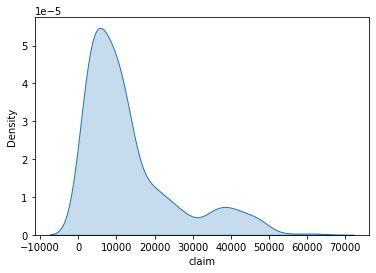

In [41]:
sns.kdeplot(df['claim'],fill=True)

<AxesSubplot: >

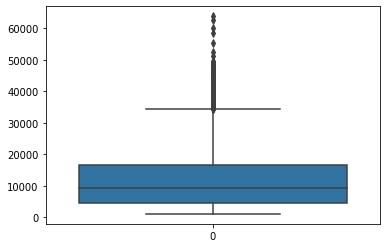

In [42]:
sns.boxplot(df['claim'])

In [45]:
iqr = df['claim'].quantile(0.75) - df['claim'].quantile(0.25)
upper_limit= df['claim'].quantile(0.75) + iqr *1.5
df['claim']= np.where(df['claim'] >upper_limit,upper_limit,df['claim'])
df = df[df['claim']<=upper_limit]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7604\3426314054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['claim']= np.where(df['claim'] >upper_limit,upper_limit,df['claim'])


In [46]:
df[df['claim']>upper_limit].shape[0]/df.shape[0]*100

0.0

# After Handling Outliers

<AxesSubplot: >

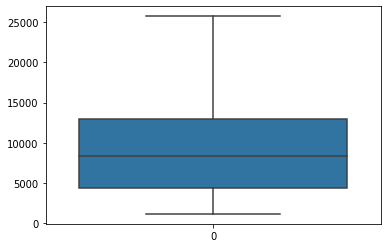

In [47]:
sns.boxplot(df['claim'])

# Catagorical Columns
- Gender
- diabetic
- Region
- smoker

# Univariate EDA

<AxesSubplot: ylabel='gender'>

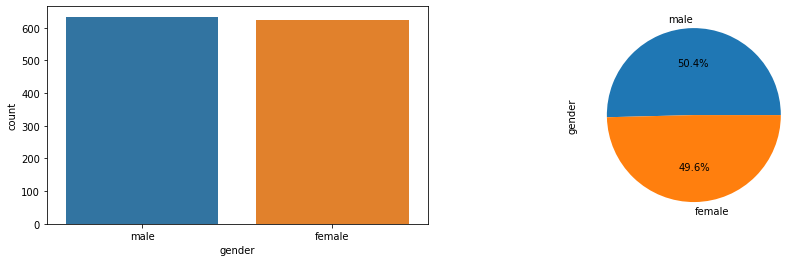

In [470]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['gender'],ax=ax1)
df['gender'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2)

<AxesSubplot: ylabel='diabetic'>

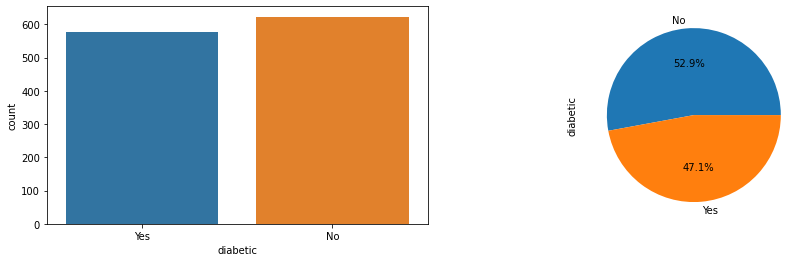

In [49]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['diabetic'],ax=ax1)
df[df['gender']=='male']['diabetic'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2)


<AxesSubplot: ylabel='children'>

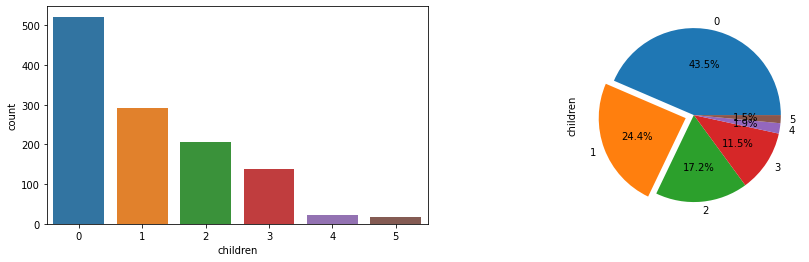

In [50]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['children'],ax=ax1)
df['children'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0,0.1,0,0,0,0])


<AxesSubplot: ylabel='smoker'>

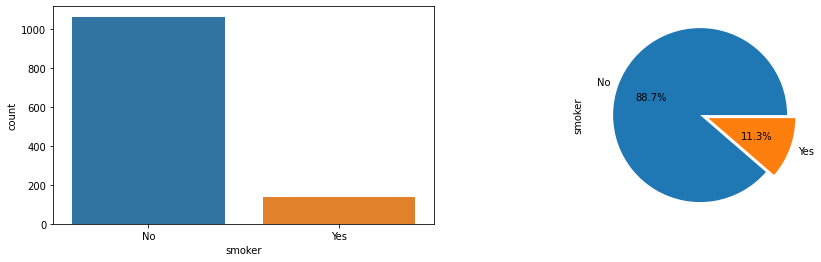

In [51]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['smoker'],ax=ax1)
df['smoker'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0,0.1])

In [52]:
df = df[~df['region'].isnull()]

<AxesSubplot: ylabel='region'>

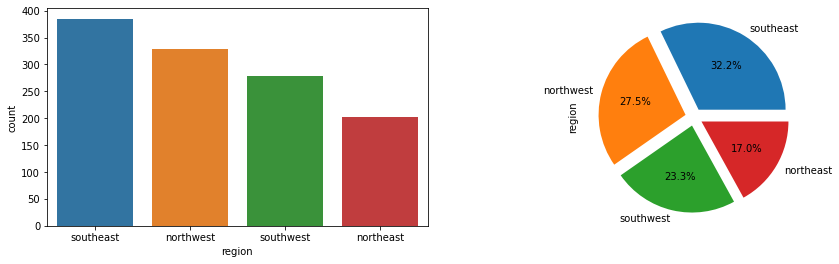

In [53]:
fig = plt.figure(figsize=(15,4))
(ax1,ax2) = fig.subplots(1,2)
sns.countplot(x=df['region'],ax=ax1)
df['region'].value_counts().plot(kind='pie',autopct='%0.1f%%',ax=ax2,explode=[0.1]*4)


# Bivariant EDA

In [54]:
df.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91.0,Yes,0,No,southeast,1121.87


# Cat to Cat
- gender with diabetic
- gender with children
- gender with smoker
- gender with region
- bmi with bloodpressure
- bloodpressure with  claim



<AxesSubplot: xlabel='gender', ylabel='count'>

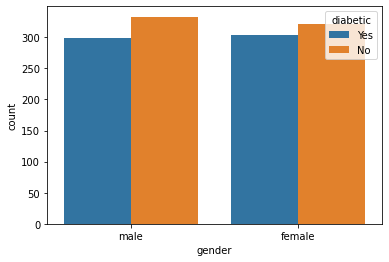

In [477]:
sns.countplot(x=df['gender'],hue=df['diabetic'])

<AxesSubplot: xlabel='gender', ylabel='count'>

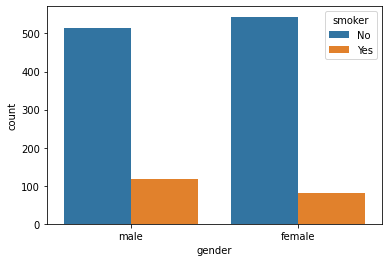

In [478]:
sns.countplot(x=df['gender'],hue=df['smoker'])

<AxesSubplot: xlabel='gender', ylabel='count'>

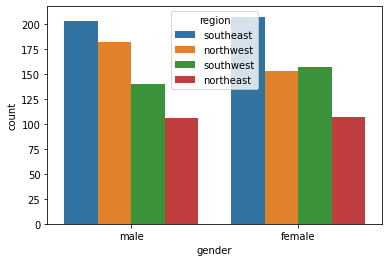

In [479]:
sns.countplot(x=df['gender'],hue=df['region'])

<AxesSubplot: xlabel='children', ylabel='count'>

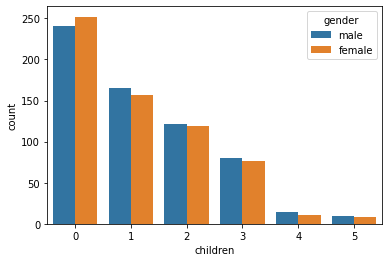

In [480]:
sns.countplot(x=df['children'],hue=df['gender'])

<AxesSubplot: xlabel='diabetic', ylabel='count'>

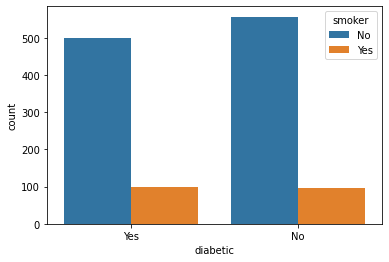

In [481]:

sns.countplot(x=df['diabetic'],hue=df['smoker'])

<AxesSubplot: xlabel='diabetic', ylabel='count'>

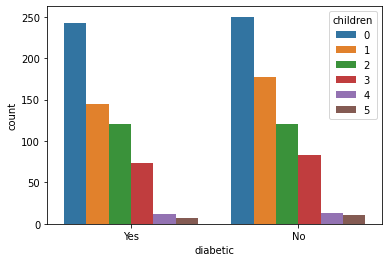

In [482]:
sns.countplot(x=df['diabetic'],hue=df['children'])

<AxesSubplot: xlabel='diabetic', ylabel='count'>

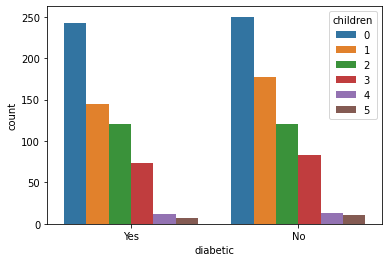

In [483]:
sns.countplot(x=df['diabetic'],hue = df['children'])

<AxesSubplot: xlabel='diabetic', ylabel='count'>

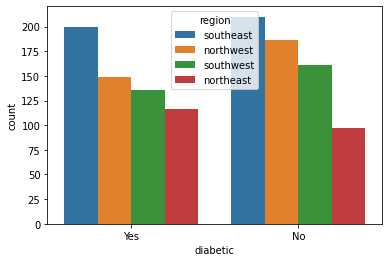

In [484]:
sns.countplot(x=df['diabetic'],hue = df['region'])

<AxesSubplot: xlabel='children', ylabel='count'>

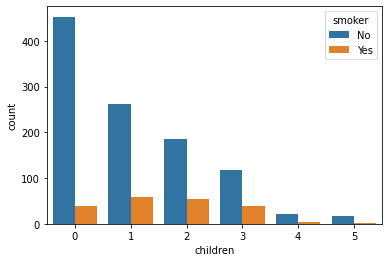

In [485]:
sns.countplot(x=df['children'],hue=df['smoker'])

<AxesSubplot: xlabel='smoker', ylabel='count'>

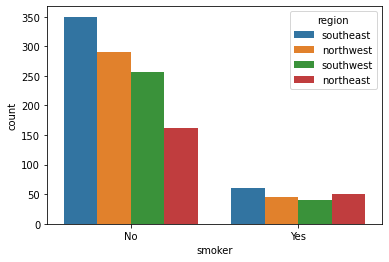

In [486]:
sns.countplot(x=df['smoker'],hue = df['region'])

# Catagorical and Numerical Columns

- gender with bmi
- gender with bloodpressure
- gender with claim
- diabetic with bmi
- diabetic with bloodpressure
- diabetic with claim
- smoker with bmi
- smoker with bloodpressure
- smoker with claim
- region with bmi
- region with bloodpressure
- region with claim

<AxesSubplot: xlabel='gender', ylabel='bmi'>

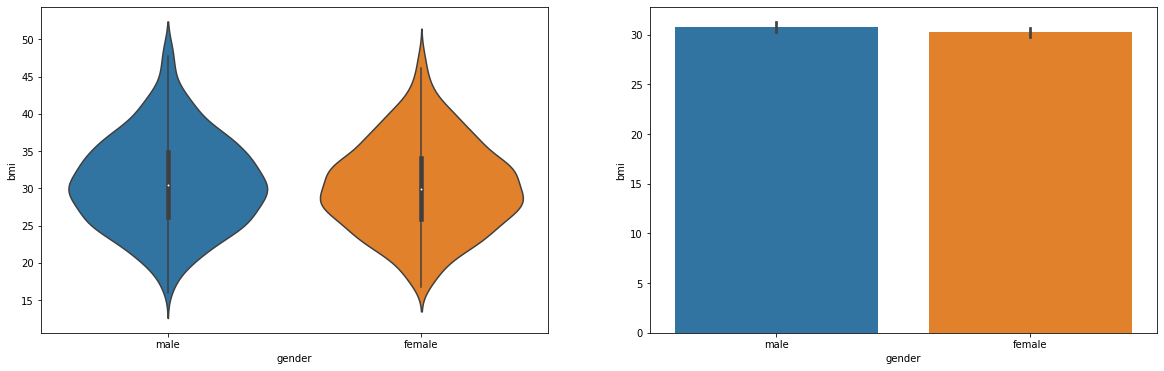

In [487]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='gender', ylabel='bloodpressure'>

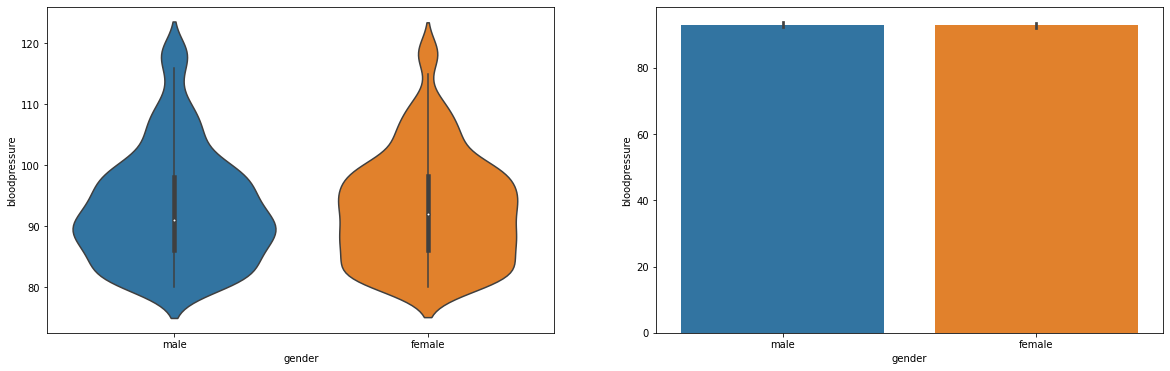

In [488]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['gender'],y=df['bloodpressure'],ax=ax2)

<AxesSubplot: xlabel='gender', ylabel='claim'>

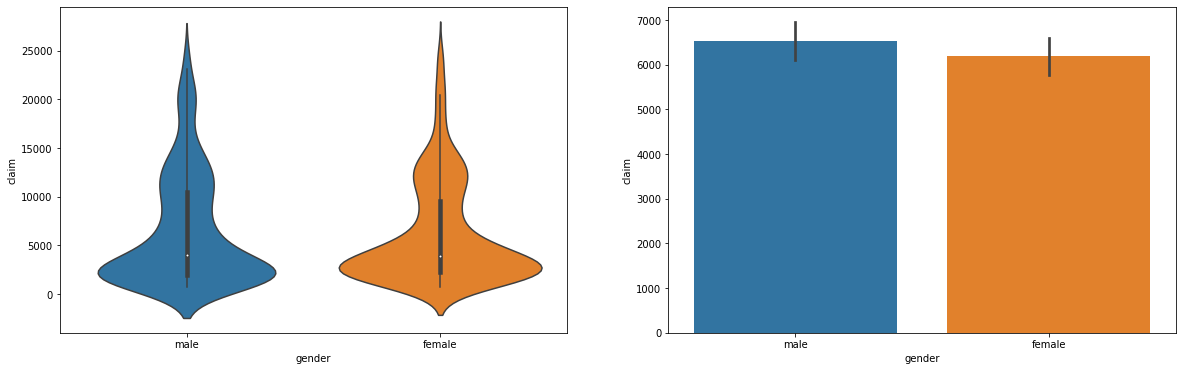

In [489]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['gender'],y=df['claim'],ax=ax1)
sns.barplot(x=df['gender'],y=df['claim'],ax=ax2)

<AxesSubplot: xlabel='diabetic', ylabel='bmi'>

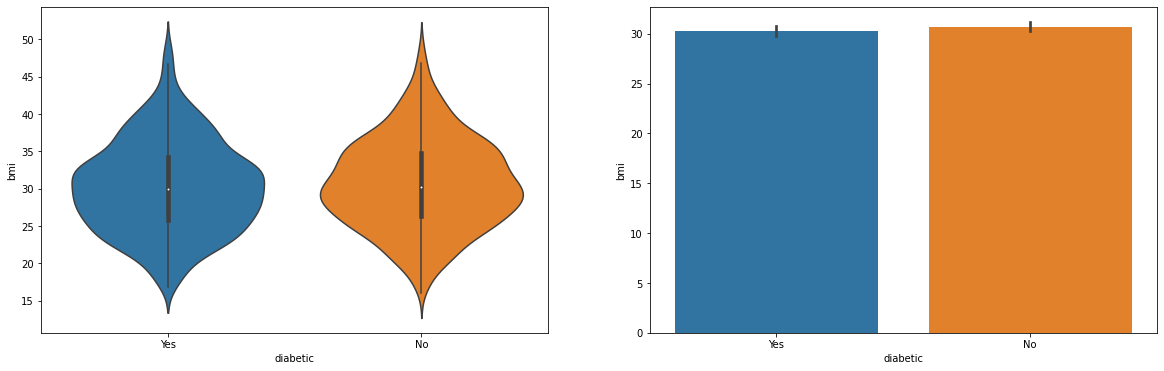

In [490]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='diabetic', ylabel='bloodpressure'>

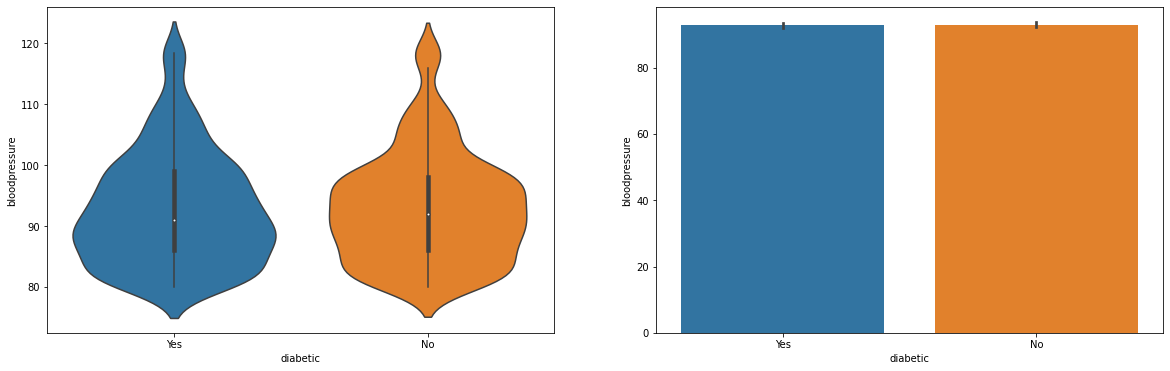

In [491]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['bloodpressure'],ax=ax2)

<AxesSubplot: xlabel='diabetic', ylabel='claim'>

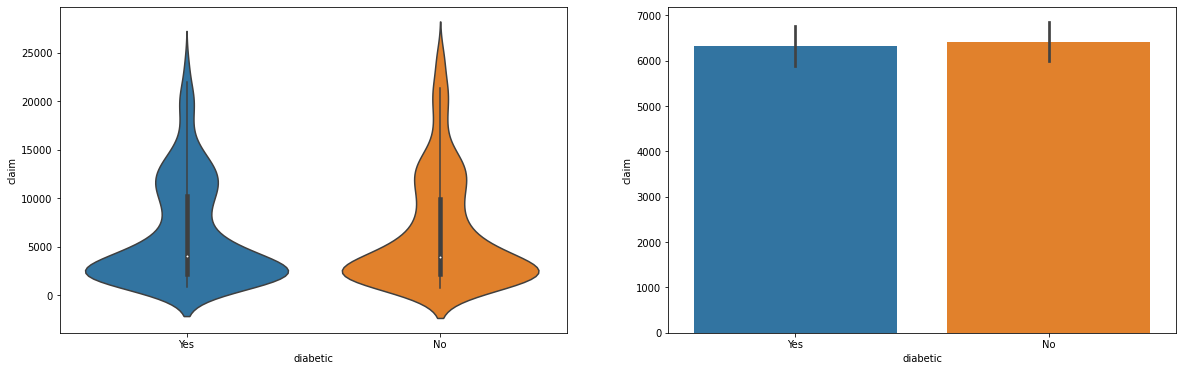

In [492]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['diabetic'],y=df['claim'],ax=ax1)
sns.barplot(x=df['diabetic'],y=df['claim'],ax=ax2)

<AxesSubplot: xlabel='smoker', ylabel='bmi'>

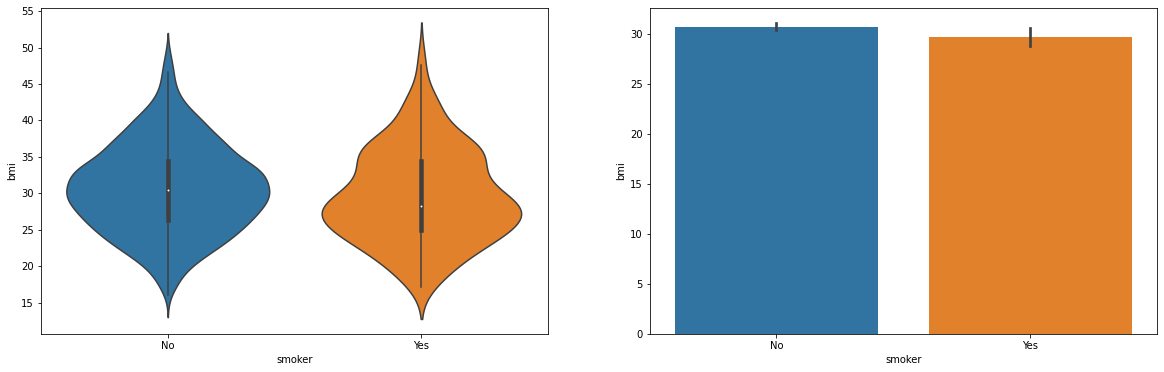

In [493]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['smoker'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['smoker'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='smoker', ylabel='bloodpressure'>

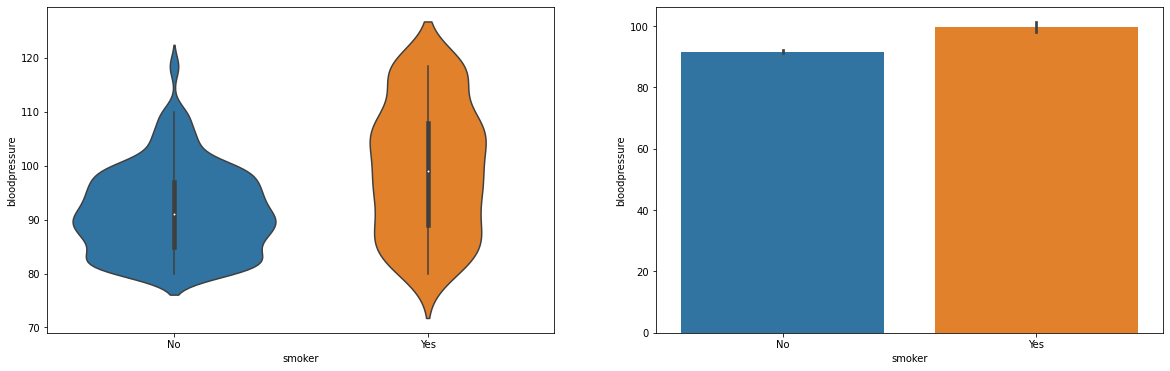

In [494]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['smoker'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['smoker'],y=df['bloodpressure'],ax=ax2)

<AxesSubplot: xlabel='smoker', ylabel='claim'>

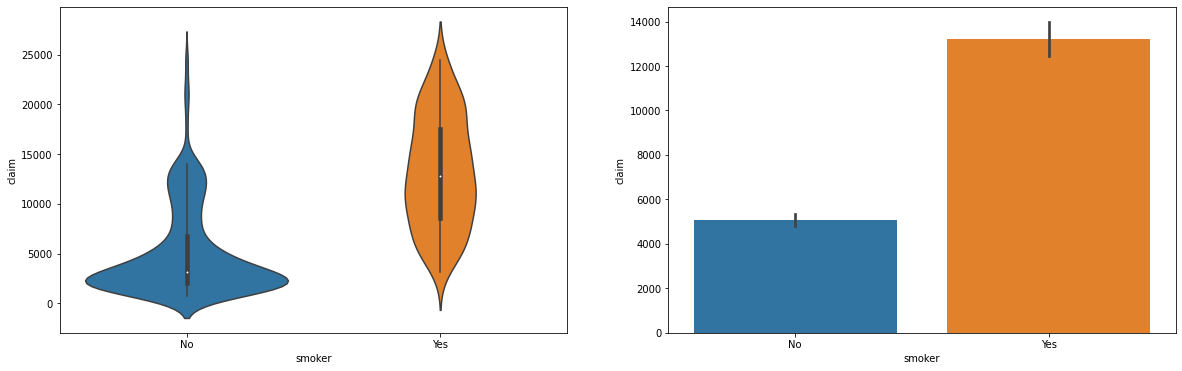

In [495]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['smoker'],y=df['claim'],ax=ax1)
sns.barplot(x=df['smoker'],y=df['claim'],ax=ax2)

<AxesSubplot: xlabel='region', ylabel='bmi'>

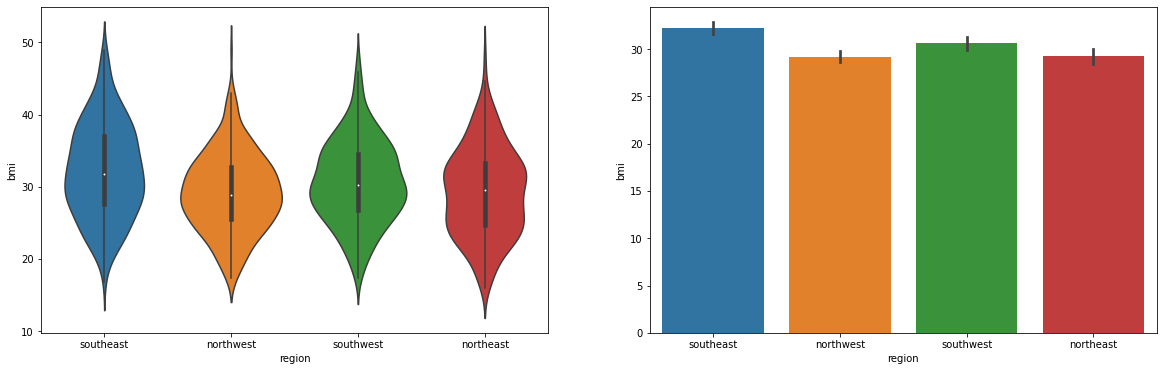

In [496]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['region'],y=df['bmi'],ax=ax1)
sns.barplot(x=df['region'],y=df['bmi'],ax=ax2)

<AxesSubplot: xlabel='region', ylabel='bloodpressure'>

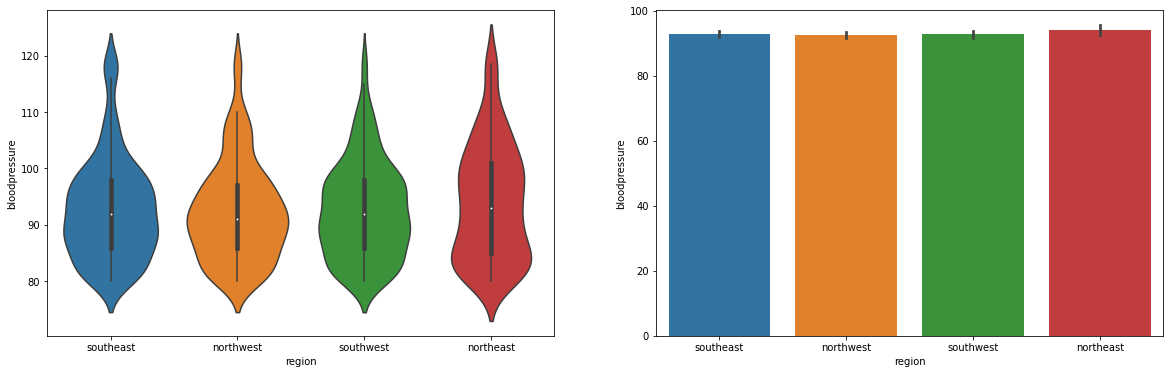

In [497]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['region'],y=df['bloodpressure'],ax=ax1)
sns.barplot(x=df['region'],y=df['bloodpressure'],ax=ax2)

<AxesSubplot: xlabel='region', ylabel='claim'>

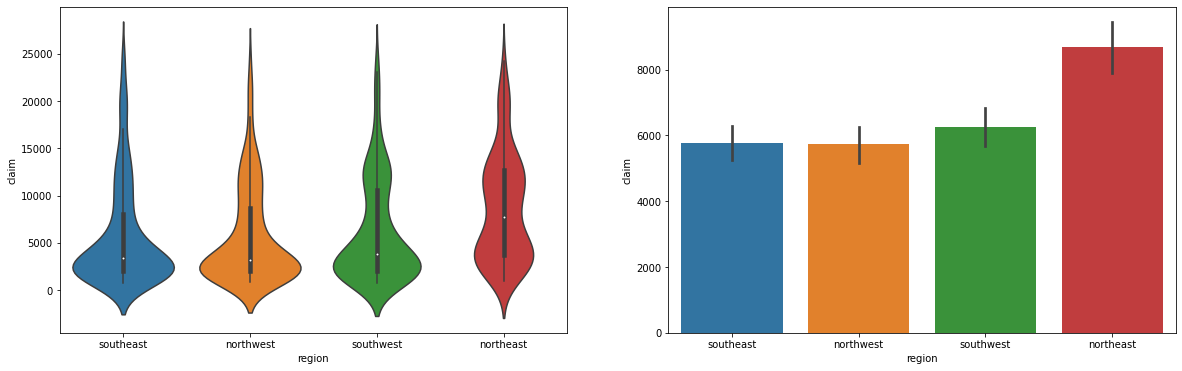

In [498]:
fig = plt.figure(figsize=(20,6))
(ax1,ax2) = fig.subplots(1,2)
sns.violinplot(x=df['region'],y=df['claim'],ax=ax1)
sns.barplot(x=df['region'],y=df['claim'],ax=ax2)

In [499]:
df.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91.0,Yes,0,No,southeast,1121.87


In [500]:
df[df['smoker']=='Yes']['bloodpressure'].describe()

count    197.000000
mean      99.591371
std       11.843981
min       80.000000
25%       89.000000
50%       99.000000
75%      108.000000
max      118.500000
Name: bloodpressure, dtype: float64

# Multivariate Data Anaysis

# Num to Num
- Age with bmi
- Age with bloodpressure
- Age with claim
- bmi with claim
- bmi with bloodpressure
- bloodpressure with  claim



In [501]:
df.shape

(1255, 9)

In [502]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91.0,Yes,0,No,southeast,1121.870000
1,24.000000,male,30.1,87.0,No,0,No,southeast,1131.510000
2,38.078652,male,33.3,82.0,Yes,0,No,southeast,1135.940000
3,38.078652,male,33.7,80.0,No,0,No,northwest,1136.400000
4,38.078652,male,34.1,100.0,No,0,No,northwest,1137.010000
...,...,...,...,...,...,...,...,...,...
1326,26.000000,male,40.6,113.0,Yes,3,Yes,northeast,12137.295000
1328,45.000000,male,42.1,117.0,No,1,Yes,southeast,24337.760000
1331,18.000000,male,41.1,104.0,No,1,Yes,southeast,24485.125000
1332,26.000000,male,37.0,118.5,No,2,Yes,southeast,16525.886667


<AxesSubplot: xlabel='bmi', ylabel='bloodpressure'>

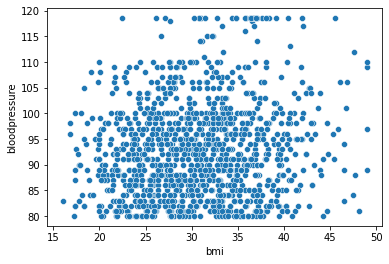

In [503]:
sns.scatterplot(x=df['bmi'],y=df['bloodpressure'])

<AxesSubplot: xlabel='bmi', ylabel='claim'>

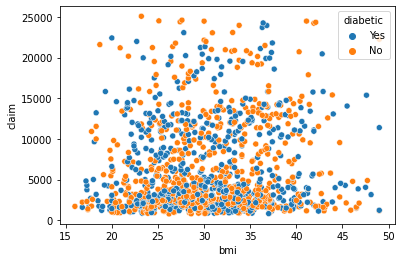

In [504]:
sns.scatterplot(x=df['bmi'],y=df['claim'],hue=df['diabetic'])

<AxesSubplot: xlabel='bloodpressure', ylabel='claim'>

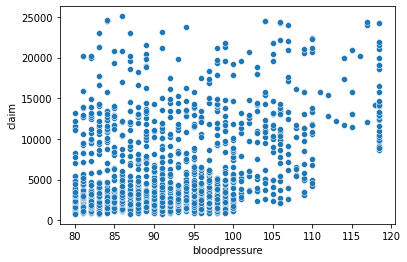

In [505]:
sns.scatterplot(x=df['bloodpressure'],y=df['claim'])

<AxesSubplot: xlabel='bloodpressure', ylabel='claim'>

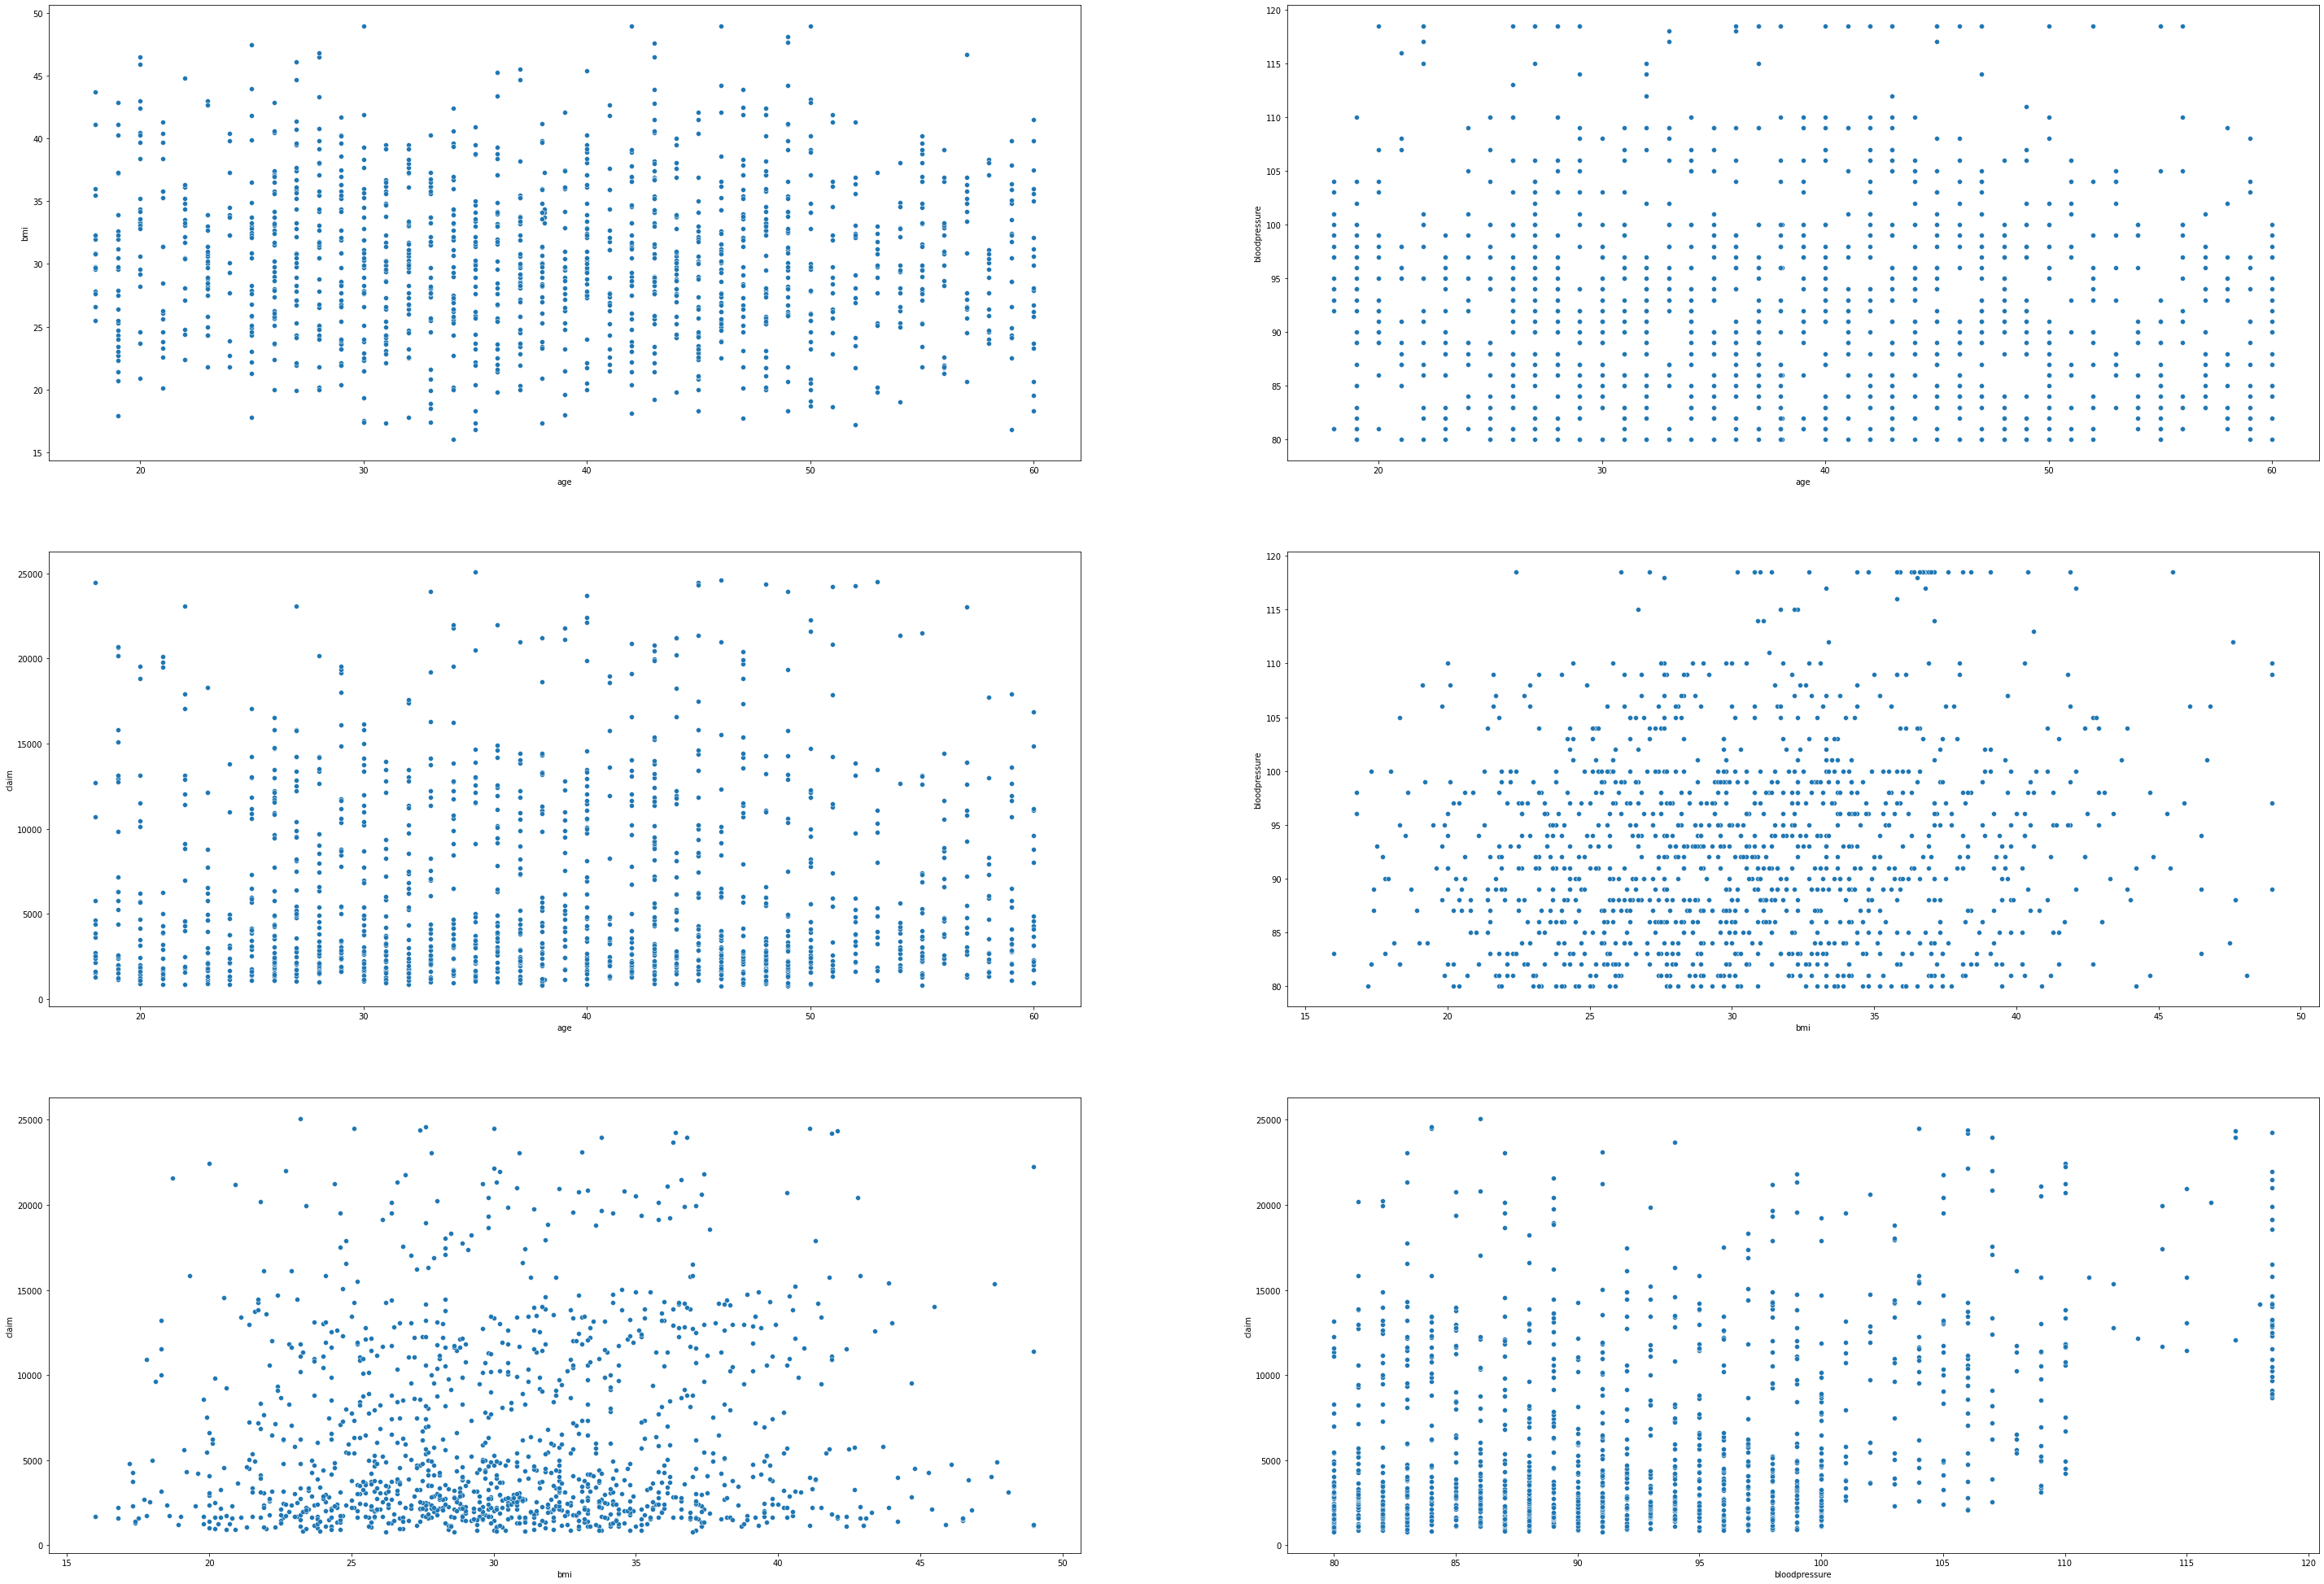

In [506]:
fig = plt.figure(figsize=(50,35))
ax1=plt.subplot(3,2,1)
ax2=plt.subplot(3,2,2)
ax3=plt.subplot(3,2,3)
ax4=plt.subplot(3,2,4)
ax5=plt.subplot(3,2,5)
ax6=plt.subplot(3,2,6)

sns.scatterplot(x=df['age'],y=df['bmi'],ax=ax1)
sns.scatterplot(x=df['age'],y=df['bloodpressure'],ax=ax2)
sns.scatterplot(x=df['age'],y=df['claim'],ax=ax3)
sns.scatterplot(x=df['bmi'],y=df['bloodpressure'],ax=ax4)
sns.scatterplot(x=df['bmi'],y=df['claim'],ax=ax5)
sns.scatterplot(x=df['bloodpressure'],y=df['claim'],ax=ax6)


In [507]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91.0,Yes,0,No,southeast,1121.870000
1,24.000000,male,30.1,87.0,No,0,No,southeast,1131.510000
2,38.078652,male,33.3,82.0,Yes,0,No,southeast,1135.940000
3,38.078652,male,33.7,80.0,No,0,No,northwest,1136.400000
4,38.078652,male,34.1,100.0,No,0,No,northwest,1137.010000
...,...,...,...,...,...,...,...,...,...
1326,26.000000,male,40.6,113.0,Yes,3,Yes,northeast,12137.295000
1328,45.000000,male,42.1,117.0,No,1,Yes,southeast,24337.760000
1331,18.000000,male,41.1,104.0,No,1,Yes,southeast,24485.125000
1332,26.000000,male,37.0,118.5,No,2,Yes,southeast,16525.886667


# Feature Engineering

In [508]:
from sklearn.preprocessing import FunctionTransformer


In [509]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [510]:
column_transformer = ColumnTransformer(
    transformers=[
        #('num_imputer', SimpleImputer(strategy='mean'), [0, 1, 2]),  # Replace missing values with means
        ('num_scaler', StandardScaler(), [0, 2,3]),  # Standardize the data
        ('func',FunctionTransformer(func=np.log1p), [0,2,3]),  # Apply a log transformation (if needed)
        ('scaler',OneHotEncoder(),[1,4,6,7])
    ],
    remainder='passthrough'  # Keep any remaining columns as they are
)


In [511]:
cols = df.columns

In [512]:
'''y = df['claim']
df.drop(columns=['claim'],inplace=True)
df'''

"y = df['claim']\ndf.drop(columns=['claim'],inplace=True)\ndf"

In [513]:
'''trsf = StandardScaler()
df['claim'] = trsf.fit_transform(df['claim'])
'''

"trsf = StandardScaler()\ndf['claim'] = trsf.fit_transform(df['claim'])\n"

In [514]:
'''trf1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),['diabetic','smoker','region'])
],remainder='passthrough')'''

"trf1 = ColumnTransformer([\n    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),['diabetic','smoker','region'])\n],remainder='passthrough')"

In [515]:
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),['age','bmi','claim','bloodpressure'])
],remainder='passthrough')

In [516]:
trf3 = ColumnTransformer([
    ('func',FunctionTransformer(func=np.log1p),['claim','bloodpressure'])
],remainder='passthrough')

In [517]:
from sklearn.pipeline import make_pipeline

In [518]:
pipe = make_pipeline(column_transformer)

In [519]:
pipe.fit(x_transform)

NameError: name 'x_transform' is not defined

In [520]:
df = pd.DataFrame(df,columns=cols)
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91.0,Yes,0,No,southeast,1121.870000
1,24.000000,male,30.1,87.0,No,0,No,southeast,1131.510000
2,38.078652,male,33.3,82.0,Yes,0,No,southeast,1135.940000
3,38.078652,male,33.7,80.0,No,0,No,northwest,1136.400000
4,38.078652,male,34.1,100.0,No,0,No,northwest,1137.010000
...,...,...,...,...,...,...,...,...,...
1326,26.000000,male,40.6,113.0,Yes,3,Yes,northeast,12137.295000
1328,45.000000,male,42.1,117.0,No,1,Yes,southeast,24337.760000
1331,18.000000,male,41.1,104.0,No,1,Yes,southeast,24485.125000
1332,26.000000,male,37.0,118.5,No,2,Yes,southeast,16525.886667


In [521]:
print(df[df['gender']=='male']['age'].min())
print(df[df['gender']=='male']['age'].max())

18.0
50.0


In [522]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91.0,Yes,0,No,southeast,1121.870000
1,24.000000,male,30.1,87.0,No,0,No,southeast,1131.510000
2,38.078652,male,33.3,82.0,Yes,0,No,southeast,1135.940000
3,38.078652,male,33.7,80.0,No,0,No,northwest,1136.400000
4,38.078652,male,34.1,100.0,No,0,No,northwest,1137.010000
...,...,...,...,...,...,...,...,...,...
1326,26.000000,male,40.6,113.0,Yes,3,Yes,northeast,12137.295000
1328,45.000000,male,42.1,117.0,No,1,Yes,southeast,24337.760000
1331,18.000000,male,41.1,104.0,No,1,Yes,southeast,24485.125000
1332,26.000000,male,37.0,118.5,No,2,Yes,southeast,16525.886667


# Cat to Cat
- gender with diabetic
- gender with smoker
- gender with region
- diabeticr with smoker
- diabeticr with region
- smoker with region

In [523]:
df.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12976\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,bloodpressure,children,claim
age,1.000000,-0.039623,-0.075251,-0.029854,0.007666
bmi,-0.039623,1.000000,0.119994,0.035282,0.078691
bloodpressure,-0.075251,0.119994,1.000000,0.043696,0.352569
children,-0.029854,0.035282,0.043696,1.000000,-0.318588
claim,0.007666,0.078691,0.352569,-0.318588,1.000000


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12976\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

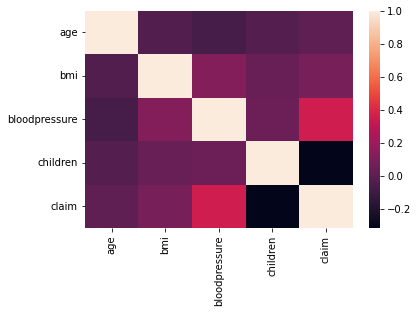

In [524]:
sns.heatmap(df.corr())

In [525]:
df.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91.0,Yes,0,No,southeast,1121.87


In [526]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91.0,Yes,0,No,southeast,1121.870000
1,24.000000,male,30.1,87.0,No,0,No,southeast,1131.510000
2,38.078652,male,33.3,82.0,Yes,0,No,southeast,1135.940000
3,38.078652,male,33.7,80.0,No,0,No,northwest,1136.400000
4,38.078652,male,34.1,100.0,No,0,No,northwest,1137.010000
...,...,...,...,...,...,...,...,...,...
1326,26.000000,male,40.6,113.0,Yes,3,Yes,northeast,12137.295000
1328,45.000000,male,42.1,117.0,No,1,Yes,southeast,24337.760000
1331,18.000000,male,41.1,104.0,No,1,Yes,southeast,24485.125000
1332,26.000000,male,37.0,118.5,No,2,Yes,southeast,16525.886667


# Feature Engineering

In [411]:
df=df.drop(columns=['gender','age','children'])
df

,bmi,bloodpressure,diabetic,smoker,region,claim
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1194,NaN,NaN,NaN,NaN,NaN,NaN
1195,NaN,NaN,NaN,NaN,NaN,NaN
1196,NaN,NaN,NaN,NaN,NaN,NaN
1197,NaN,NaN,NaN,NaN,NaN,NaN


In [527]:
df

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91.0,Yes,0,No,southeast,1121.870000
1,24.000000,male,30.1,87.0,No,0,No,southeast,1131.510000
2,38.078652,male,33.3,82.0,Yes,0,No,southeast,1135.940000
3,38.078652,male,33.7,80.0,No,0,No,northwest,1136.400000
4,38.078652,male,34.1,100.0,No,0,No,northwest,1137.010000
...,...,...,...,...,...,...,...,...,...
1326,26.000000,male,40.6,113.0,Yes,3,Yes,northeast,12137.295000
1328,45.000000,male,42.1,117.0,No,1,Yes,southeast,24337.760000
1331,18.000000,male,41.1,104.0,No,1,Yes,southeast,24485.125000
1332,26.000000,male,37.0,118.5,No,2,Yes,southeast,16525.886667


In [528]:
df['claim'].describe()

count     1255.000000
mean      6369.513222
std       5543.534562
min        768.000000
25%       2151.754167
50%       3943.600000
75%      10083.470000
max      25081.770000
Name: claim, dtype: float64

In [529]:
df.head(1)

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91.0,Yes,0,No,southeast,1121.87


In [530]:
from sklearn.preprocessing import RobustScaler

In [531]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91.0,Yes,0,No,southeast,1121.87
1,24.000000,male,30.1,87.0,No,0,No,southeast,1131.51
2,38.078652,male,33.3,82.0,Yes,0,No,southeast,1135.94
3,38.078652,male,33.7,80.0,No,0,No,northwest,1136.40
4,38.078652,male,34.1,100.0,No,0,No,northwest,1137.01


In [532]:
df.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.000000,male,23.2,91.0,Yes,0,No,southeast,1121.87
1,24.000000,male,30.1,87.0,No,0,No,southeast,1131.51
2,38.078652,male,33.3,82.0,Yes,0,No,southeast,1135.94
3,38.078652,male,33.7,80.0,No,0,No,northwest,1136.40
4,38.078652,male,34.1,100.0,No,0,No,northwest,1137.01


In [533]:
df= pd.get_dummies(df,columns=['region','smoker','diabetic'],drop_first=True)
df.sample(10)

,age,gender,bmi,bloodpressure,children,claim,region_northwest,region_southeast,region_southwest,smoker_Yes,diabetic_Yes
869,40.0,male,37.1,84.0,1,6173.585000,0,0,1,0,1
916,43.0,female,27.6,105.0,0,13217.090000,0,0,0,0,1
882,55.0,female,31.4,85.0,0,12622.180000,1,0,0,0,0
454,24.0,male,32.3,92.0,2,2112.693333,0,1,0,0,1
529,46.0,female,27.7,83.0,3,1820.377500,1,0,0,0,0
891,34.0,male,37.0,92.0,0,12741.170000,0,0,0,0,1
1034,36.0,female,28.5,87.0,1,9164.120000,0,1,0,1,0
366,24.0,male,23.9,84.0,5,846.683333,0,0,1,0,0
166,51.0,female,24.5,80.0,1,1354.555000,1,0,0,0,1
769,48.0,female,37.4,80.0,1,5479.845000,1,0,0,0,1


In [534]:
x = df.drop(columns=['claim'])
y = df['claim']

In [537]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [538]:
trsf = ColumnTransformer(transformers=[
    ('standard_scaler',StandardScaler(),['bmi','bloodpressure'])
    
],remainder='passthrough')

#    ('robust_scaler',StandardScaler



In [539]:
x_train_transform = trsf.fit_transform(x_train)
x_test_transform = trsf.transform(x_test)

In [540]:
class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=1000):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [541]:
lr = GDRegressor()

In [543]:
lr =LinearRegression()

In [544]:
lr.fit(x_train_transform,y_train)

ValueError: could not convert string to float: 'female'

In [427]:
y_pred = lr.predict(x_test_transform)
y_pred

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [428]:
import sklearn.metrics as mse

In [429]:
print('mean_absolute_error',mse.mean_absolute_error(y_test,y_pred))

ValueError: Input contains NaN.

In [ ]:
print('r2_score',mse.r2_score(y_test,y_pred))

In [ ]:
output = pd.DataFrame(y_pred,y_test)
output